콜백함수란? 어떤 함수를 수행 시 그 함수에서 사용자가 지정한 함수를 호출하는 것.

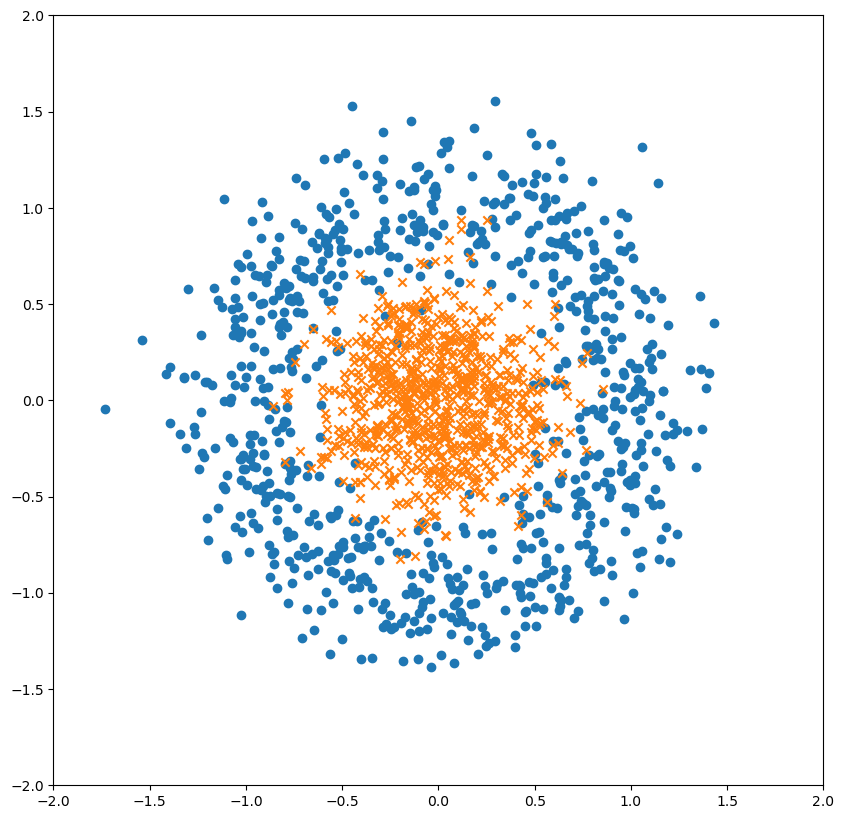

In [2]:
#Q1. 데이터를 생성하여 훈련 데이터와 테스트 데이터로 나누어 훈련 데이터를 시각화 해보자.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
#from keras.layers.core import Dense



data, target = make_circles(n_samples=2000, noise=0.2, factor=0.3)
X_train, X_test, y_train, y_test = train_test_split(
                                            data,
                                            target,
                                            test_size=0.2,
                                            stratify=target)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal', xlim=(-2, 2), ylim=(-2, 2))
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker="o")
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker="x")
plt.show()

In [3]:
#Q2) 간단한 신경망을 만들어 확인 

model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['acc']
)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [4]:
#Q3) 학습 
history = model.fit(
                    X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=[X_test, y_test]
            )

Epoch 1/100


50/50 [==============================] - 1s 6ms/step - loss: 0.6975 - acc: 0.5362 - val_loss: 0.6899 - val_acc: 0.6275
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6928 - acc: 0.6369 - val_loss: 0.6907 - val_acc: 0.6400
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6911 - acc: 0.5263 - val_loss: 0.6912 - val_acc: 0.5175
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6901 - acc: 0.5444 - val_loss: 0.6909 - val_acc: 0.5150
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6896 - acc: 0.5344 - val_loss: 0.6902 - val_acc: 0.5050
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6888 - acc: 0.5512 - val_loss: 0.6900 - val_acc: 0.5250
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6878 - acc: 0.5894 - val_loss: 0.6891 - val_acc: 0.5625
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6872 -

50/50 [==============================] - 0s 2ms/step - loss: 0.2783 - acc: 0.9519 - val_loss: 0.2695 - val_acc: 0.9475
Epoch 60/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2721 - acc: 0.9513 - val_loss: 0.2635 - val_acc: 0.9475
Epoch 61/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2664 - acc: 0.9525 - val_loss: 0.2577 - val_acc: 0.9500
Epoch 62/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2610 - acc: 0.9494 - val_loss: 0.2522 - val_acc: 0.9500
Epoch 63/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2556 - acc: 0.9500 - val_loss: 0.2469 - val_acc: 0.9525
Epoch 64/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2506 - acc: 0.9525 - val_loss: 0.2420 - val_acc: 0.9500
Epoch 65/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2459 - acc: 0.9513 - val_loss: 0.2372 - val_acc: 0.9525
Epoch 66/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2412 - acc: 0

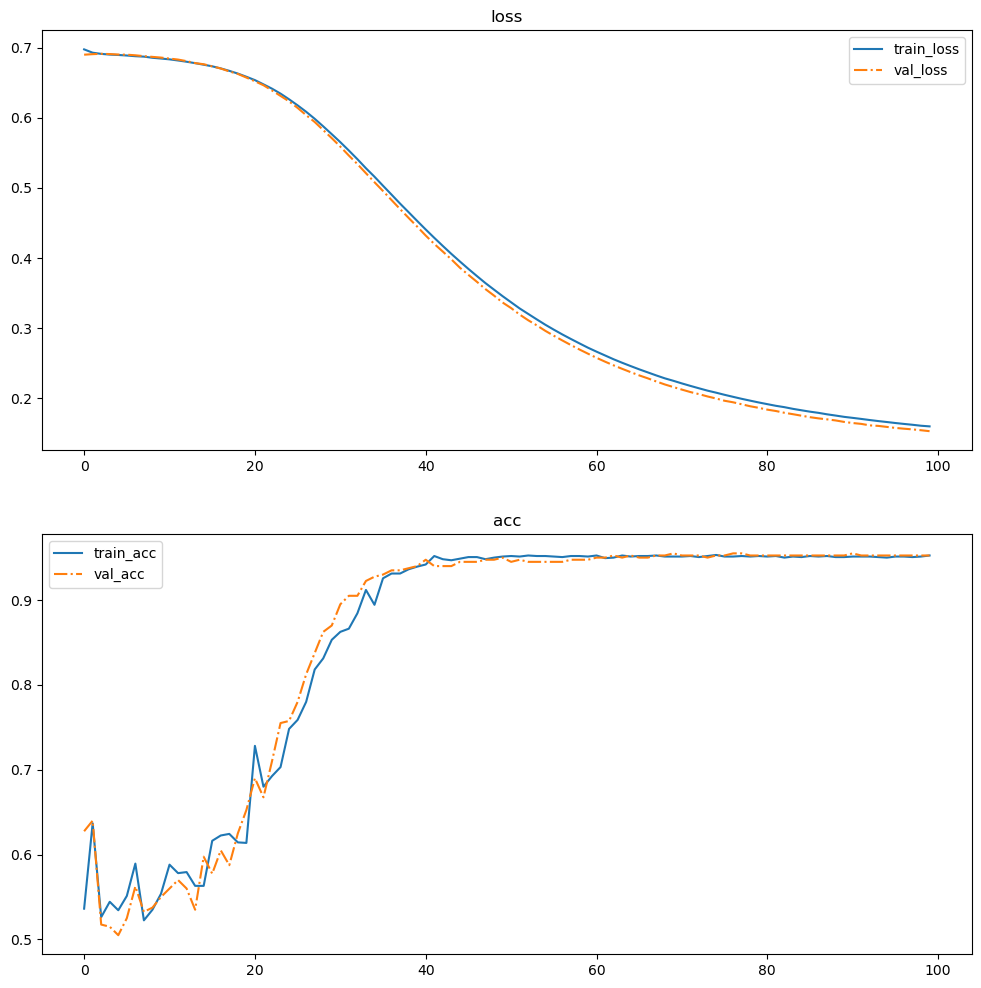

In [5]:
#Q4) 손실함수와 정답률의 변화를 시각화 
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 1, 1, title="loss")
ax.plot(history.epoch, history.history["loss"], label="train_loss")
ax.plot(history.epoch, history.history["val_loss"], linestyle="-.", label="val_loss")
ax.legend()

ax = fig.add_subplot(2, 1, 2, title="acc")
ax.plot(history.epoch, history.history["acc"], label="train_acc")
ax.plot(history.epoch, history.history["val_acc"], linestyle="-.", label="val_acc")
ax.legend()
plt.show()

###  keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
 
    값의 변화가 정지했을 때에 훈련을 종료하는 목적을 가진 메소드 


- monitor : 모니터링 할 값.
- min_delta : 모니터링 할 값에 대해 개선으로 결정되는 최소 변화 값. 즉, min_delta보다 절대치의 변화가 작으면 개선되어 있지 않다고 판단
- patience : 여기에 지정된 에포크 수 동안 (감시하는 값에) 개선이 없으면 훈련이 중지
- verbose : 중복 모드.
- mode : {auto, min, max} 중 하나가 선택. 
  - min : 모니터링 할 값의 감소가 중지되면 훈련이 종료
  - max : 모니터링 할 값의 증가가 중지되면 훈련이 종료. 
  - auto:  자동으로 모니터링되는 값

In [10]:
from keras.callbacks import EarlyStopping


early_stopping =  EarlyStopping(
                            monitor='val_loss',
                            min_delta=0.0,
                            patience=2,verbose=1,restore_best_weights=True
)

history = model.fit(
                    X_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=[X_test, y_test],
                    callbacks=[early_stopping] 
            )# monitor에 설정된 값이 patience 값의 횟수를 계속해서 min_delta 이상 개선되지 않으면 학습이 중지
              # monitor에는 'val_loss' 외에 'val_acc'등도 설정할 수 있다. 

Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1257 - acc: 0.9506 - val_loss: 0.1226 - val_acc: 0.9575
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1256 - acc: 0.9500 - val_loss: 0.1231 - val_acc: 0.9550
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1251 - acc: 0.9513 - val_loss: 0.1221 - val_acc: 0.9575
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1248 - acc: 0.9500 - val_loss: 0.1221 - val_acc: 0.9575
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1248 - acc: 0.9500 - val_loss: 0.1222 - val_acc: 0.9550
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1245 - acc: 0.9506 - val_loss: 0.1224 - val_acc: 0.9550
Epoch 6: early stopping


In [11]:
from keras.callbacks import EarlyStopping


early_stopping =  EarlyStopping(
                            monitor='val_loss',
                            min_delta=0.001,
                            patience=5,verbose=1,restore_best_weights=True)

history = model.fit(
                    X_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=[X_test, y_test],
                    callbacks=[early_stopping] 
            )# monitor에 설정된 값이 patience 값의 횟수를 계속해서 min_delta 이상 개선되지 않으면 학습이 중지
              # monitor에는 'val_loss' 외에 'val_acc'등도 설정할 수 있다. 

Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1246 - acc: 0.9506 - val_loss: 0.1214 - val_acc: 0.9575
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1245 - acc: 0.9513 - val_loss: 0.1212 - val_acc: 0.9550
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1243 - acc: 0.9506 - val_loss: 0.1220 - val_acc: 0.9575
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1240 - acc: 0.9506 - val_loss: 0.1221 - val_acc: 0.9575
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1239 - acc: 0.9513 - val_loss: 0.1216 - val_acc: 0.9550
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1241 - acc: 0.9494 - val_loss: 0.1214 - val_acc: 0.9575
Epoch 6: early stopping


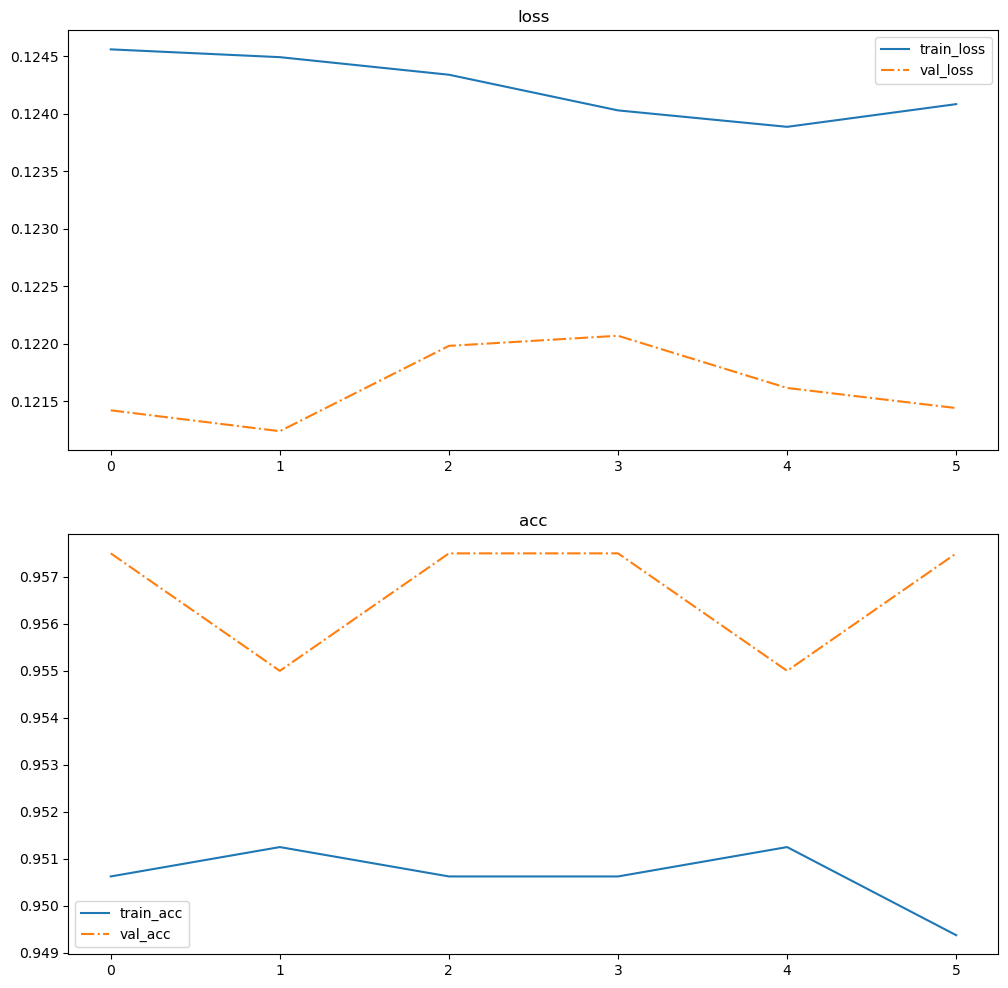

In [12]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 1, 1, title="loss")
ax.plot(history.epoch, history.history["loss"], label="train_loss")
ax.plot(history.epoch, history.history["val_loss"], linestyle="-.", label="val_loss")
ax.legend()

ax = fig.add_subplot(2, 1, 2, title="acc")
ax.plot(history.epoch, history.history["acc"], label="train_acc")
ax.plot(history.epoch, history.history["val_acc"], linestyle="-.", label="val_acc")
ax.legend()
plt.show()

In [14]:
from keras.callbacks import EarlyStopping


early_stopping =  EarlyStopping(
                            monitor='val_acc',
                            min_delta=0.001,
                            patience=10,
                            mode = 'max',
                            verbose=1,restore_best_weights=True)

history = model.fit(
                    X_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=[X_test, y_test],
                    callbacks=[early_stopping] 
                    )

Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1244 - acc: 0.9513 - val_loss: 0.1214 - val_acc: 0.9575
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1244 - acc: 0.9500 - val_loss: 0.1219 - val_acc: 0.9575
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1240 - acc: 0.9494 - val_loss: 0.1211 - val_acc: 0.9550
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1244 - acc: 0.9500 - val_loss: 0.1215 - val_acc: 0.9575
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1239 - acc: 0.9506 - val_loss: 0.1212 - val_acc: 0.9575
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1236 - acc: 0.9500 - val_loss: 0.1211 - val_acc: 0.9550
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1235 - acc: 0.9494 - val_loss: 0.1211 - val_acc: 0.9550
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - 